In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
trainData = pd.read_csv("/kaggle/input/titanic/train.csv")
testData = pd.read_csv("/kaggle/input/titanic/test.csv")

* Read Train & Test Data Files

In [3]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. Visualizing, Aanalyzing and Investigating the Data**

* As a Conclusion from the above 5 diagrams, we find that:
    1. Survivals were way less than Drawns
    2. Females were way more than the Males Survivors
    3. Merging 1 and 3 for better visualization
    4. Pclass 3 had the least survivals
    5. Merging 1 and 5 for better visualization
    

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

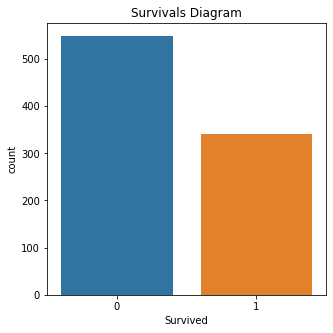

In [6]:
plt.subplots(figsize=(5, 5))
sns.countplot(x='Survived', data=trainData)
plt.title('Survivals Diagram')
plt.show()

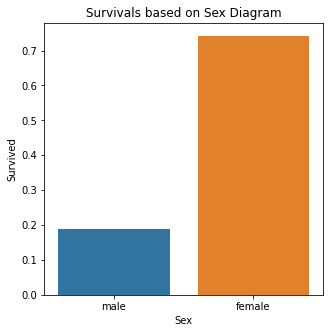

In [7]:
plt.subplots(figsize=(5, 5))
sns.barplot(x='Sex', y='Survived', data=trainData, ci=None)
plt.title('Survivals based on Sex Diagram')
plt.show()

<AxesSubplot:xlabel='Survived'>

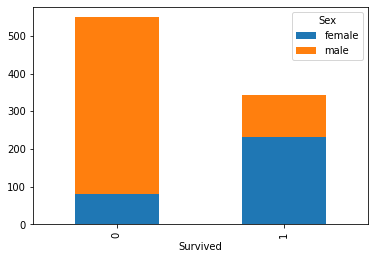

In [8]:
grouped = trainData.groupby('Survived')['Sex']
grouped.value_counts().unstack().plot(kind="bar",stacked="True")

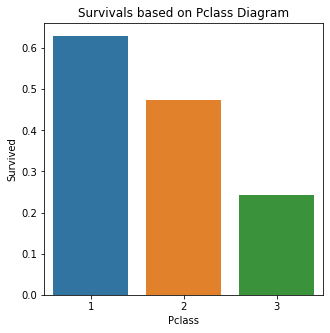

In [9]:
plt.subplots(figsize=(5, 5))
sns.barplot(x='Pclass', y='Survived', data=trainData, ci=None)
plt.title('Survivals based on Pclass Diagram')
plt.show()

<AxesSubplot:xlabel='Survived'>

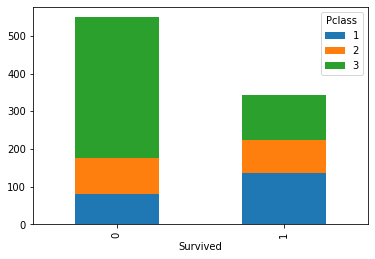

In [10]:
grouped = trainData.groupby('Survived')['Pclass']
grouped.value_counts().unstack().plot(kind="bar",stacked="True")

# **2. Preprocessing the Data**

* Check for Null values in train and test data.

In [11]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Handling NaN Column Cells**
1. First: Drop Cabin Column as most of the values are lacking from trainData and testData (around 76% of values NaN).
2. Second: Drop the rows having NaN cells in Embarked Column from trainData as they are only 2, not so effective.
3. Third: Deal with the Fare empty cell in the testData.
4. Fourth: Deal with the missing "Age" Column.

In [13]:
# Dropping Cabin Column from Train and Test Data
trainData.drop(columns=['Cabin'], inplace=True)
testData.drop(columns=['Cabin'], inplace=True)

# Dropping NaN Rows of Embarked from Train Data
trainData.dropna(subset=['Embarked'], inplace=True)

In [14]:

trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Visualizing the Diagram above, we find that using the Mode of values could be a good option to replace NaN Values of Fare Column.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

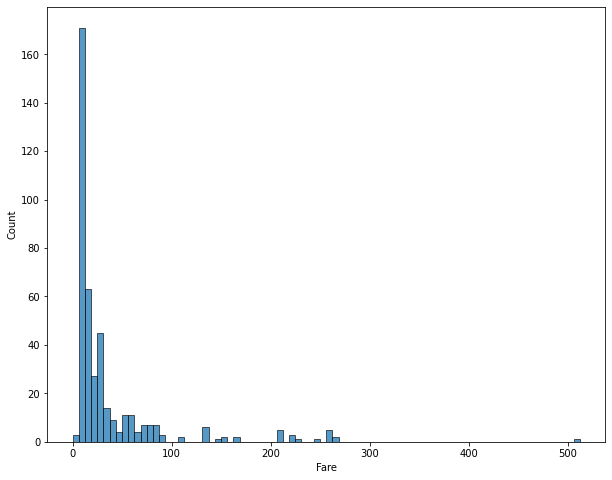

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(testData.Fare)

In [16]:
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mode()[0])

* In the below cells, we check the NaN values after removing those in the Cabin, Embarked and Fare Columns.

In [17]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [18]:
testData.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

**Removing the NaN Values in Age Columns needed to be as accurate as possible as I believe it is an important feature to be considered.**
* First: Plot the Histogram for the ages to decide which is the best Interpolation to apply

<AxesSubplot:xlabel='Age', ylabel='Count'>

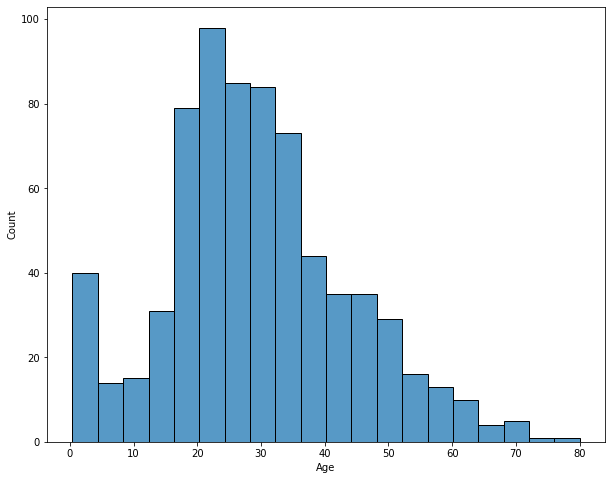

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(trainData.Age)

* Visualizing the Diagram above,
* Since our model is positively skewed, Therefore, applying Interpolation using Mode or Median would possibly give the best values for the NaN Values.
* In my model, I used Mode Imutation for the missing values.

In [20]:
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].mode()[0])
testData['Age'] = testData['Age'].fillna(testData['Age'].mode()[0])

* Testing our preprocessing on the Train Data

In [21]:
trainData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
testData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 3. Model Building & Evaluation

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
trainData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Using get_dummies to convert the Categorical Values of "Sex" Column to a 0's and 1's.**

In [25]:
y = trainData["Survived"]
# Create X
features = ['Pclass', 'Sex','Fare', 'Age']
X = pd.get_dummies(trainData[features])
test_X = pd.get_dummies(testData[features])

**Random Initialization for the Model**

In [26]:
randomForest_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=50)

# Split into testing and training data. (Random_state = 20 for shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

# Fit the Model
randomForest_model.fit(X_train, y_train)


# Model Accuracy
randomForest_model.score(X_test, y_test)

0.8202247191011236

**Using the Grid Search Cross Validation Technique to Improve the Model.**

In [27]:
from sklearn.model_selection import GridSearchCV

**Hyperparameters Tuning**
* Setting Parameters for the Grid Search to Try.
* Applying Cross Validation to avoid overfitting.

In [28]:
param_grid = {
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [2, 5, 7, 9,11]
             }


In [29]:
from sklearn.model_selection import GridSearchCV
# 10 Folds for the Cross Validation
grid_clf = GridSearchCV(randomForest_model, param_grid, cv=5)
validated_model = grid_clf.fit(X, y)

In [30]:
validated_model.best_params_

{'max_depth': 7, 'n_estimators': 50}

In [31]:
validated_model.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=50)

In [32]:
validated_model.best_score_

0.8369136037580145

In [33]:
# Model Prediction
model_predictions = validated_model.predict(test_X)

In [34]:
submission_output = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': model_predictions})
submission_output.to_csv('my_final_submission.csv', index=False)
print("Submission Output File saved Successfully")

Submission Output File saved Successfully
